# Predict Rain in Australia from weather data
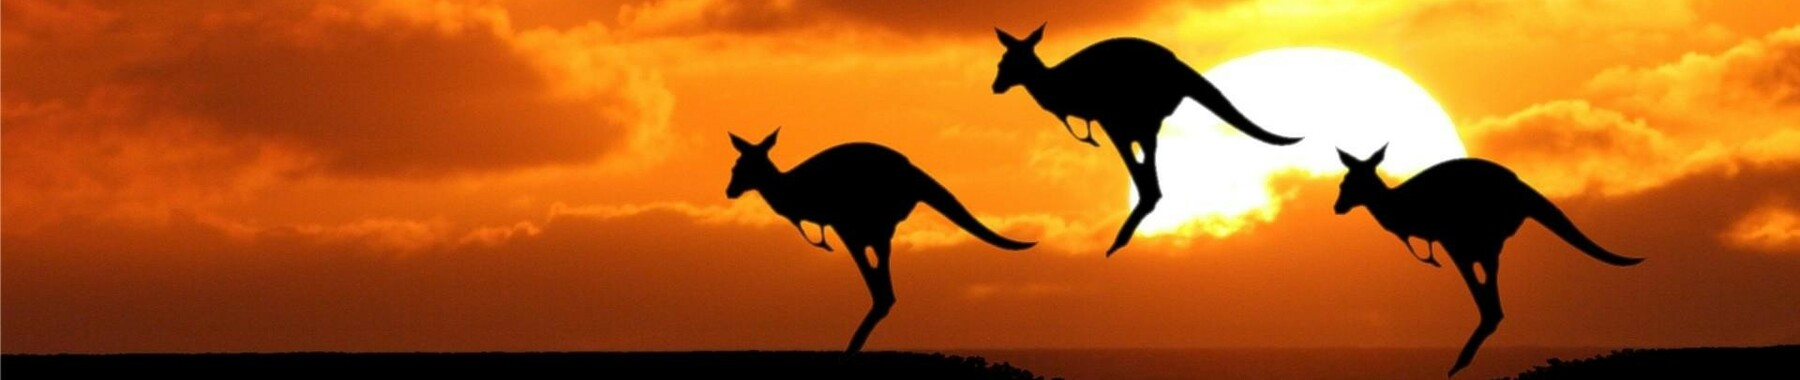

This dataset contains about 10 years of daily weather observations from many locations across Australia.
RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

Source & Acknowledgements
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weatherAUS.csv')

In [2]:
weather = df.copy()

In [3]:
weather.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


In [4]:
weather = weather[weather['RainTomorrow'].notna()]

In [5]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [6]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [8]:
date_column = ['Date']
cat_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
num_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [9]:
print((weather.isnull().sum()/len(weather))*100)

Date              0.000000
Location          0.000000
MinTemp           0.447983
MaxTemp           0.226453
Rainfall          0.988797
Evaporation      42.789026
Sunshine         47.692924
WindGustDir       6.561504
WindGustSpeed     6.519308
WindDir9am        7.041838
WindDir3pm        2.656952
WindSpeed9am      0.948007
WindSpeed3pm      1.849599
Humidity9am       1.247600
Humidity3pm       2.538803
Pressure9am       9.855619
Pressure3pm       9.832411
Cloud9am         37.735332
Cloud3pm         40.152469
Temp9am           0.635756
Temp3pm           1.917113
RainToday         0.988797
RainTomorrow      0.000000
dtype: float64


### EDA Note 1: Most of columns have null values. These needs to be imputed.
### EDA Note 2: For Evaporation, Sunshine, Cloud9am and clud3pm - we might need to get rid of feature which should be option 2 other than the imputung. Try both.

In [10]:
weather[date_column]

,Date
0,2008-12-01
1,2008-12-02
2,2008-12-03
3,2008-12-04
4,2008-12-05
...,...
145454,2017-06-20
145455,2017-06-21
145456,2017-06-22
145457,2017-06-23


### EDA note 3- Date column can be split into day of the year and turned into continuous. Year is not required, assuming weather change effect to be null and climate remained cocnsistent over time period of 10 years.

In [11]:
weather[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


### EDA Note 4 - 'RainToday', 'RainTomorrow' needs label encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
weather['RainToday'] = le.fit_transform(weather['RainToday'])
weather['RainTomorrow'] = le.fit_transform(weather['RainTomorrow'])

In [13]:
weather['RainToday'].value_counts()

RainToday
0    109332
1     31455
2      1406
Name: count, dtype: int64

In [14]:
weather['RainTomorrow'].value_counts()

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64

In [15]:
cat_columns.remove('RainToday')
num_columns.append('RainToday')
num_columns.append('RainTomorrow')

In [16]:
corr_matrix = weather[num_columns].corrwith(weather['RainTomorrow'])
corr_matrix.sort_values(ascending = False)

RainTomorrow     1.000000
Humidity3pm      0.446160
Cloud3pm         0.381870
Cloud9am         0.317380
RainToday        0.309652
Humidity9am      0.257161
Rainfall         0.239032
WindGustSpeed    0.234010
WindSpeed9am     0.090995
WindSpeed3pm     0.087817
MinTemp          0.083936
Temp9am         -0.025691
Evaporation     -0.119285
MaxTemp         -0.159237
Temp3pm         -0.192424
Pressure3pm     -0.226031
Pressure9am     -0.246371
Sunshine        -0.450768
dtype: float64

### EDA Note 5: Top Correlations to look out for - Sunshine, Humidity3pm, Cloud3pm, Cloud9am, RainToday, Humidity9am, Pressure9am, Rainfall, WindGustSpeed, Pressure3pm in descending order

Build a Heatmap for correlations

<Axes: >

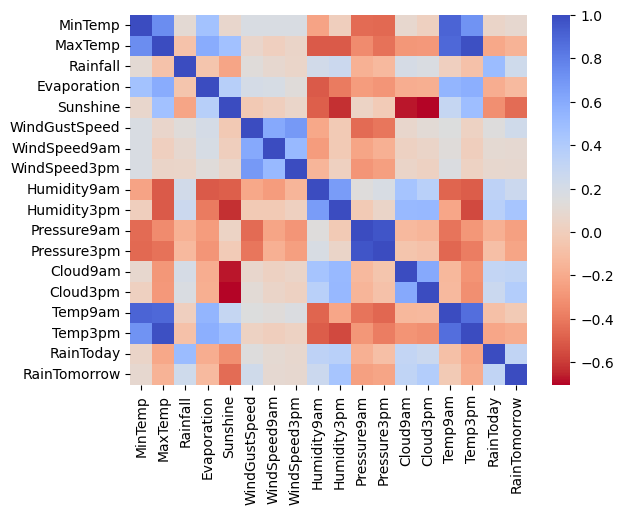

In [17]:
corr_matrix = weather[num_columns].corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm_r')

### EDA Note 6: PCA can be used to reduce features since Sunshine is highly co-related with Cloud9am, Cloud3pm, Humidity. Most of the features are highly co-related with each other.

In [18]:
print(weather['Temp9am'].corr(weather['Temp3pm']))
print(weather['MaxTemp'].corr(weather['Temp3pm']))
print(weather['Sunshine'].corr(weather['Cloud3pm']))
print(weather['Sunshine'].corr(weather['Cloud9am']))

0.8605743134381304
0.9845620097168867
-0.7042024587578652
-0.6756103440032434


In [19]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE

# pca = PCA(n_components = 2, random_state = 42)

# weather_y = weather[weather['RainTomorrow'] == 1]
# weather_n = weather[weather['RainTomorrow'] == 0][:40000]
# weather_T = pd.concat([weather_y, weather_n])
# X = weather_T.notna()
# y = X.iloc[:,-1]
# X = weather_T.notna().drop('RainTomorrow', axis = 1)
# X_reduced_pca = pca.fit_transform(X.values)
# X_reduced_tsne = TSNE(n_components = 2, random_state = 42).fit_transform(X.values)


In [20]:
# f, (ax1, ax2) = plt.subplots(1,2, figsize = (15,4))
# f.suptitle('Clusters using Dimension Reduction', fontsize = 14)

# blue_patch = mpatches.Patch(color = 'b', label = 'No rain')
# red_patch = mpatches.Patch(color = 'r', label = 'Rain')

# #T-SNE Scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap = 'coolwarm', label = 'No Rain')
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap = 'coolwarm', label =  'Rain')
# ax1.set_title('t-SNE')
# ax1.legend(handles = [blue_patch, red_patch])

# #PCA Scatter plot
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap = 'coolwarm', label = 'No Rain')
# ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap = 'coolwarm', label =  'Rain')
# ax2.set_title('PCA')
# ax2.legend(handles = [blue_patch, red_patch])



Checking for Outliers in fields which have high impact on output label -
* Sunshine, 
* Humidity3pm, 
* Cloud3pm, 
* Cloud9am, 
* RainToday, 
* Humidity9am, 
* Pressure9am, 
* Rainfall, 
* WindGustSpeed, 
* Pressure3pm

In [4]:
import warnings
warnings.filterwarnings('ignore')

def check_outliers(x):
    plt.figure(figsize = (8,4))
    ax1 = plt.subplot(1,2,1)
    ax1 = sns.distplot(x)
    ax2 = plt.subplot(1,2,2)
    ax2 = sns.boxplot(x.values)
    plt.show()
    x_v = x.dropna().values
    q25, q75 = np.percentile(x_v,25), np.percentile(x_v,75)
    iqr = q75 - q25
    lower_range = q25 - 1.5 * (iqr)
    upper_range = q75 + 1.5 * iqr
    print('Lower Range:', lower_range,'Upper Range:', upper_range)
    outliers = []
    for i in x_v:
        if i < lower_range or i > upper_range:
            outliers.append(i)
    print('Number of Outliers:', len(outliers))
    return outliers

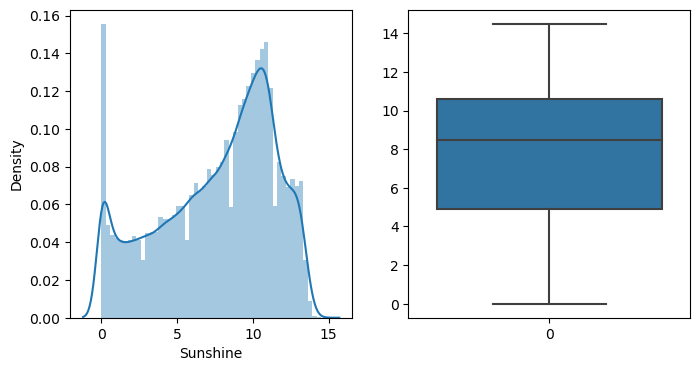

Lower Range: -3.6499999999999986 Upper Range: 19.15
Number of Outliers: 0


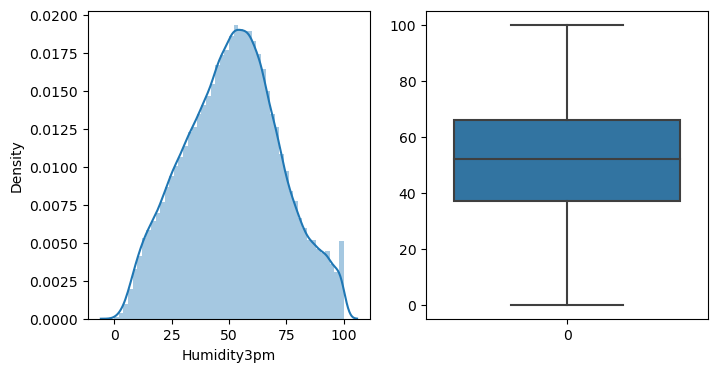

Lower Range: -6.5 Upper Range: 109.5
Number of Outliers: 0


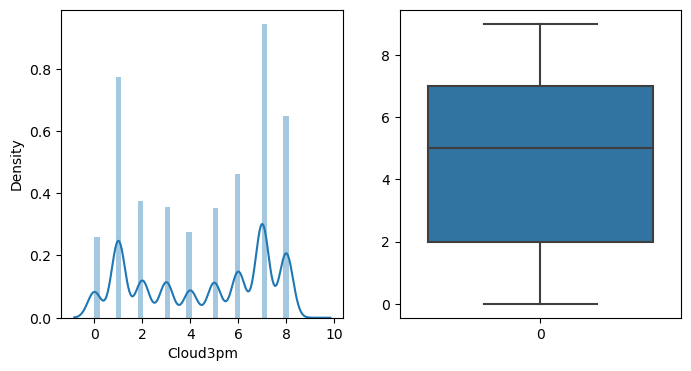

Lower Range: -5.5 Upper Range: 14.5
Number of Outliers: 0


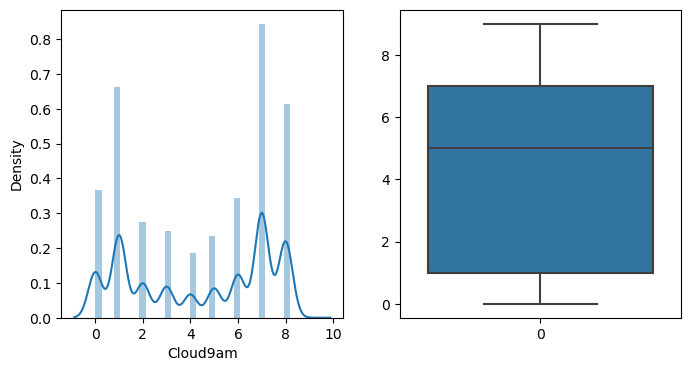

Lower Range: -8.0 Upper Range: 16.0
Number of Outliers: 0


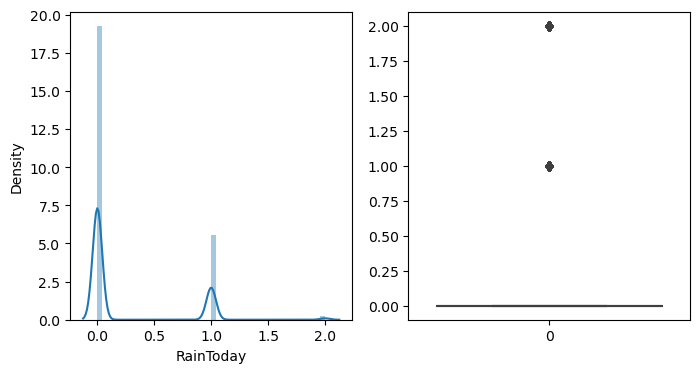

Lower Range: 0.0 Upper Range: 0.0
Number of Outliers: 32861


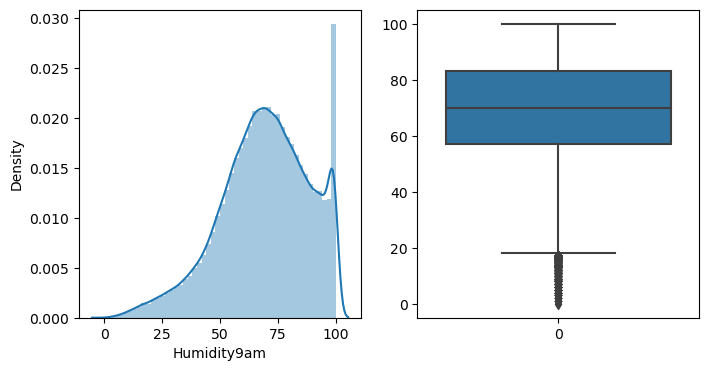

Lower Range: 18.0 Upper Range: 122.0
Number of Outliers: 1419


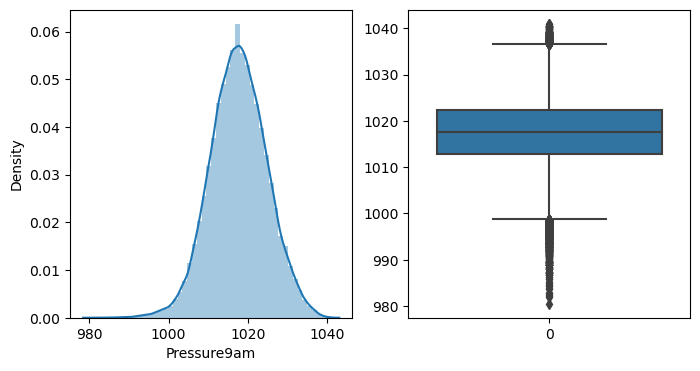

Lower Range: 998.65 Upper Range: 1036.65
Number of Outliers: 1174


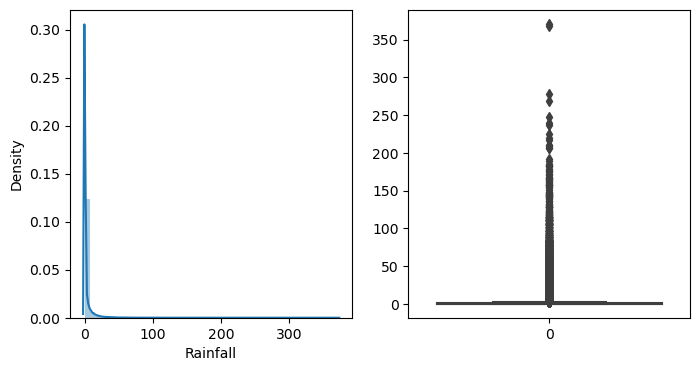

Lower Range: -1.2000000000000002 Upper Range: 2.0
Number of Outliers: 25228


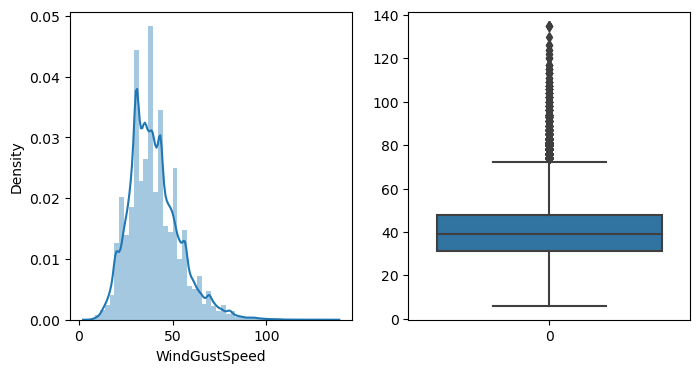

Lower Range: 5.5 Upper Range: 73.5
Number of Outliers: 3006


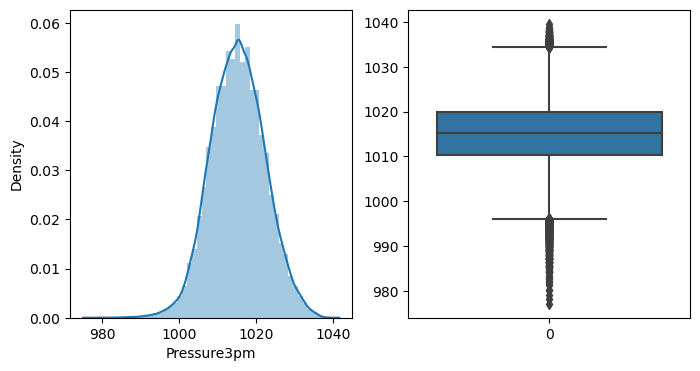

Lower Range: 996.0 Upper Range: 1034.4
Number of Outliers: 906


[993.0,
 1035.2,
 982.9,
 994.3,
 1035.1,
 1034.6,
 1036.0,
 995.4,
 995.7,
 994.8,
 1036.1,
 1036.0,
 1035.2,
 993.1,
 995.7,
 995.9,
 1034.9,
 1036.2,
 1034.9,
 995.1,
 1036.4,
 1035.0,
 1034.8,
 1036.8,
 995.3,
 1035.2,
 1035.1,
 994.5,
 993.1,
 994.5,
 993.8,
 995.8,
 995.8,
 993.7,
 1035.0,
 995.9,
 1034.7,
 991.6,
 1035.1,
 1035.9,
 995.7,
 1035.6,
 995.5,
 1034.5,
 1035.7,
 995.8,
 995.6,
 994.9,
 995.5,
 979.0,
 995.2,
 1035.7,
 989.0,
 1036.3,
 1035.0,
 1034.5,
 1036.8,
 1035.5,
 1035.0,
 1035.1,
 995.2,
 993.4,
 994.0,
 991.4,
 991.0,
 990.3,
 1034.8,
 1035.7,
 989.8,
 995.6,
 1035.7,
 1034.8,
 1034.6,
 1036.7,
 994.8,
 1036.0,
 995.9,
 1034.9,
 1035.5,
 994.2,
 994.0,
 995.4,
 994.3,
 1035.2,
 1035.9,
 989.3,
 995.0,
 1036.0,
 1035.1,
 1035.0,
 1037.0,
 995.8,
 994.9,
 1035.9,
 1035.0,
 1035.4,
 993.9,
 993.6,
 995.6,
 993.9,
 1034.8,
 984.2,
 994.9,
 1035.1,
 1036.2,
 994.7,
 995.4,
 1035.7,
 1035.7,
 1035.1,
 994.4,
 992.8,
 1034.7,
 1035.2,
 1035.6,
 1034.5,
 1035.9,
 995

In [22]:
check_outliers(weather['Sunshine'])
check_outliers(weather['Humidity3pm'])
check_outliers(weather['Cloud3pm'])
check_outliers(weather['Cloud9am'])
check_outliers(weather['RainToday'])
check_outliers(weather['Humidity9am'])
check_outliers(weather['Pressure9am'])
check_outliers(weather['Rainfall'])
check_outliers(weather['WindGustSpeed'])
check_outliers(weather['Pressure3pm'])


### EDA Note 7: Remove outliers from:
* Pressure3pm
* WindGustSpeed
* Pressure9am
* Humidity9am

### EDA Note 8: RainToday is imbalanced. Need to Balance it while splitting. Need to 

<Axes: xlabel='RainToday', ylabel='count'>

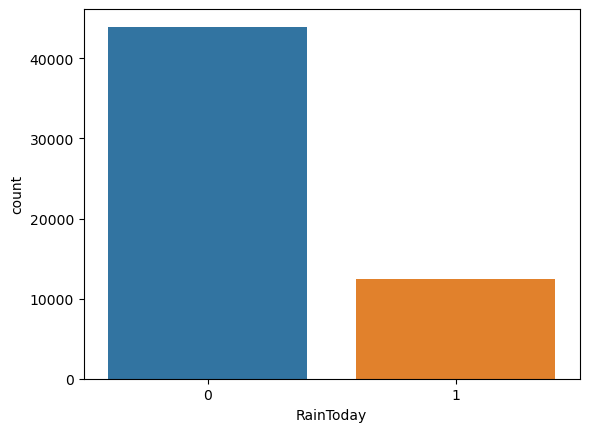

In [23]:
sns.countplot(x = 'RainToday', data = weather.dropna())

Minority Class Percentage:0.22


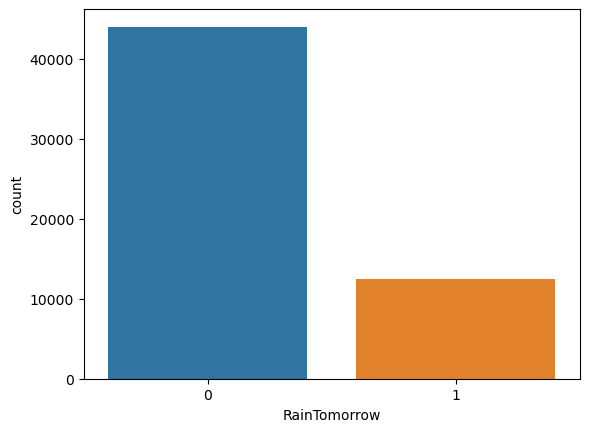

In [24]:
sns.countplot(x = 'RainTomorrow', data = weather.dropna())
print('Minority Class Percentage:{:.2f}'.format((weather['RainTomorrow'].dropna().value_counts())[:][1]/((weather['RainTomorrow'].dropna().value_counts())[:][1] + (weather['RainTomorrow'].dropna().value_counts())[:][0])) )

### EDA Note 9 : Random Undersample to 40% 0, 1 ratio

In [25]:
cat_columns

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

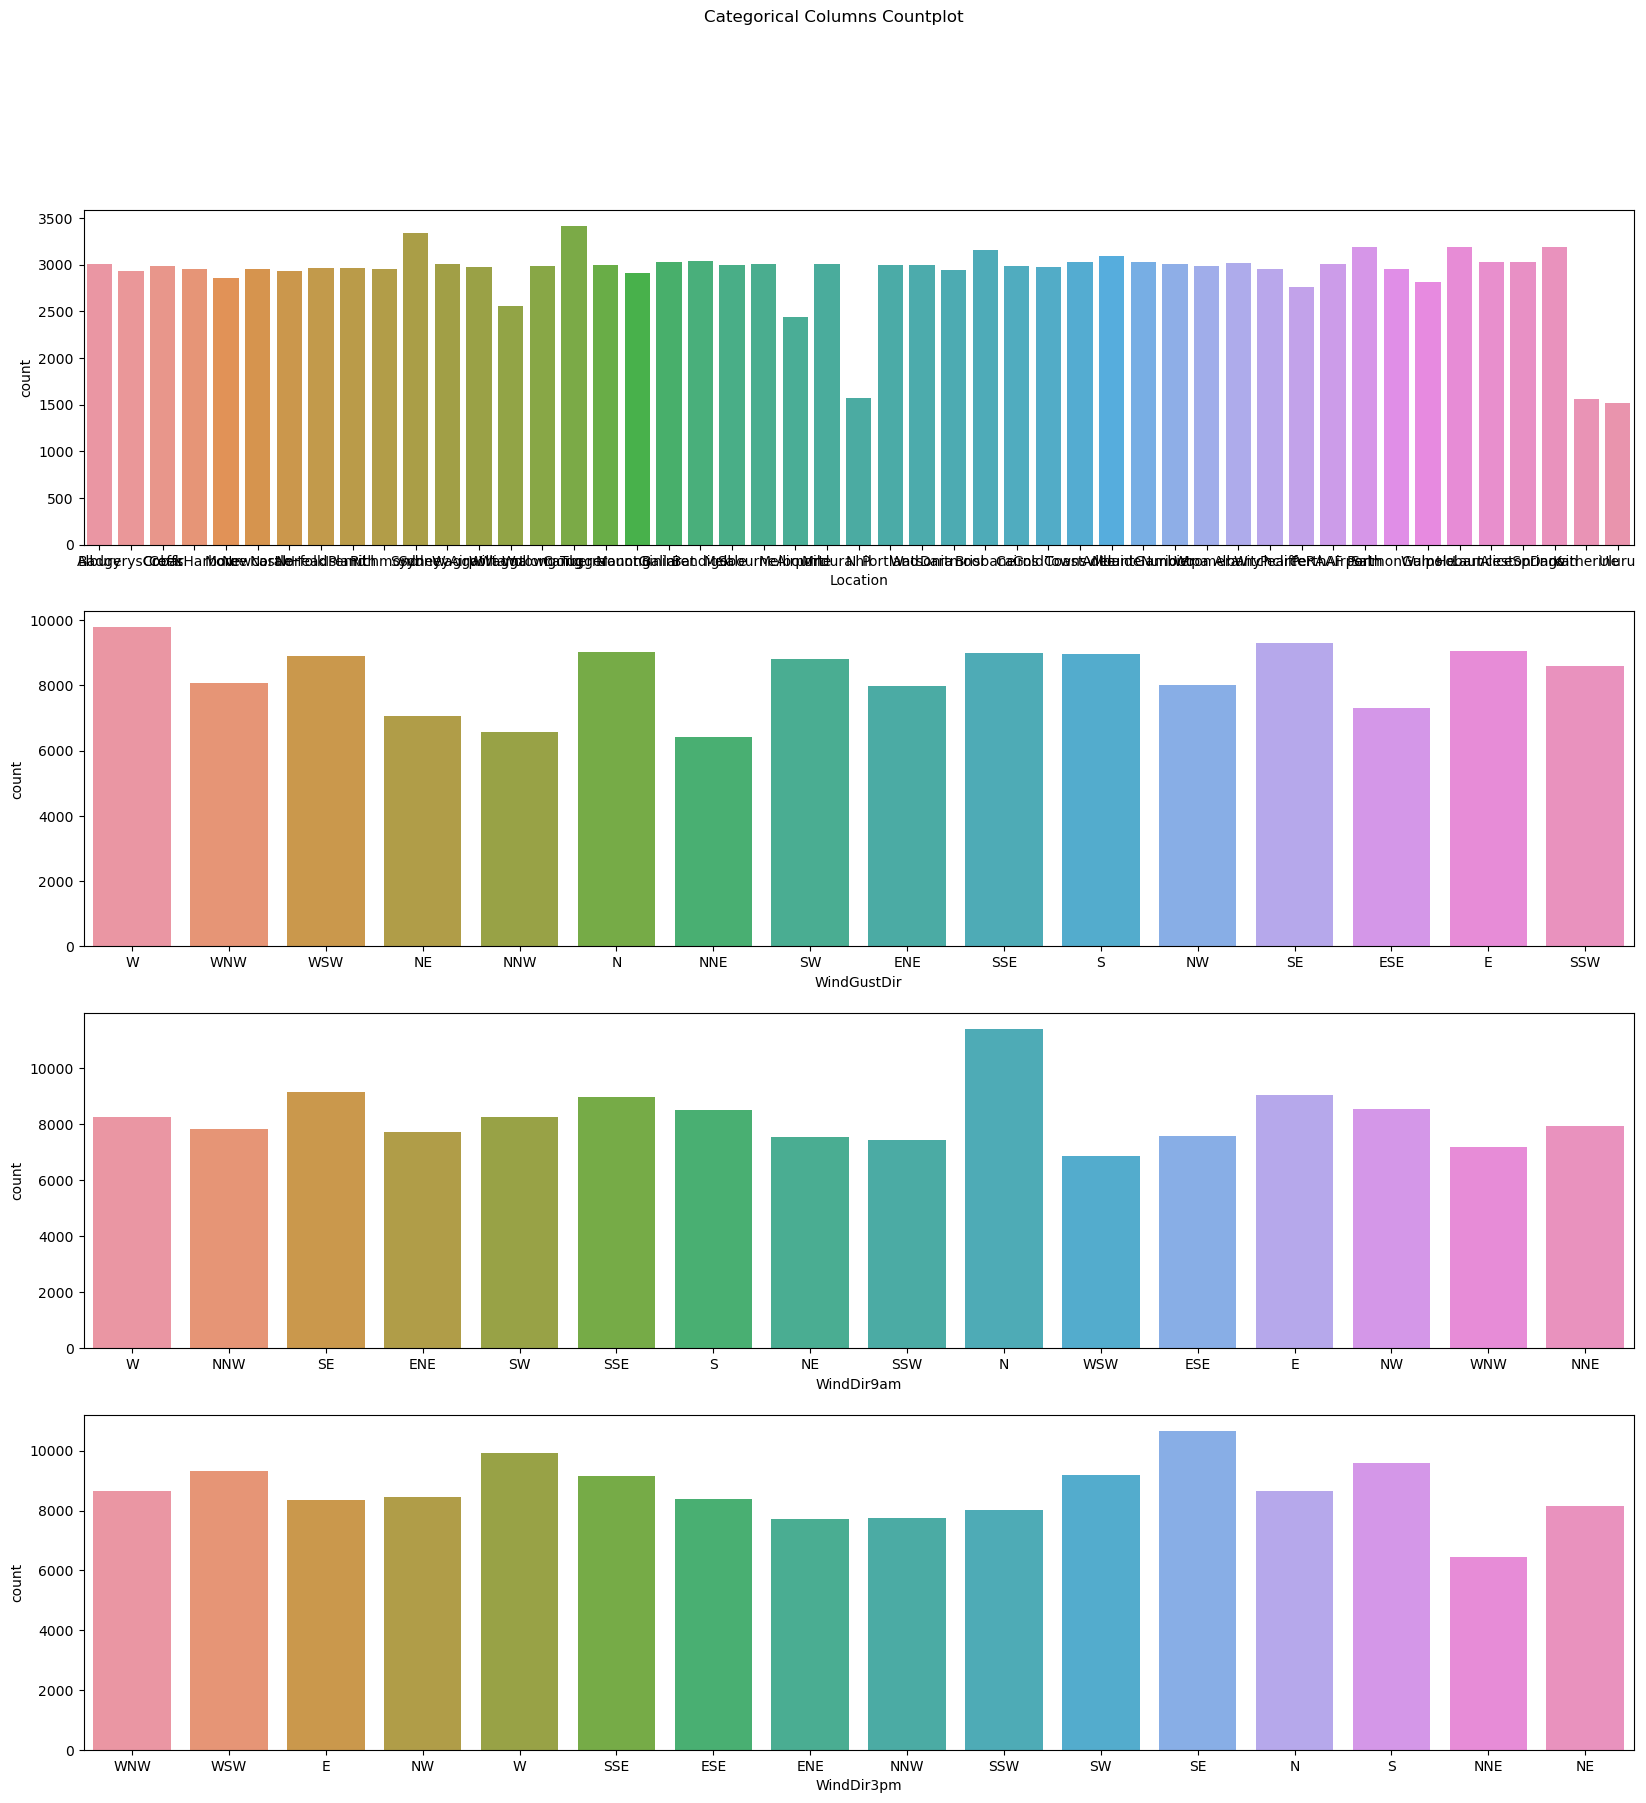

In [26]:
fig, axes = plt.subplots(4,1, figsize = (20,20))
fig.suptitle('Categorical Columns Countplot')
sns.countplot(ax = axes[0],x = 'Location', data = weather)
sns.countplot(ax = axes[1],x = 'WindGustDir', data = weather)
sns.countplot(ax = axes[2],x = 'WindDir9am', data = weather)
sns.countplot(ax = axes[3],x = 'WindDir3pm', data = weather)

plt.show()


### EDA Note 10: Cat Columns are all evenly distributed

In [27]:
print(weather['WindDir3pm'].value_counts())
print(weather['WindDir9am'].value_counts())
print(weather['WindGustDir'].value_counts())
print(weather['Location'].value_counts())

WindDir3pm
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: count, dtype: int64
WindDir9am
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: count, dtype: int64
WindGustDir
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: count, dtype: int64
Location
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3

 EDA Note 1: Most of columns have null values. These needs to be imputed.
 
 EDA Note 2: For Evaporation, Sunshine, Cloud9am and clud3pm - we might need to get rid of feature which should be option 2 other than the imputung. Try both.
 
 EDA note 3- Date column can be split into day of the year and turned into continuous. Year is not required, assuming weather change effect to be null and climate remained cocnsistent over time period of 10 years.
 
 EDA Note 4 - 'RainToday', 'RainTomorrow' needs label encoding
 
 EDA Note 5: Top Correlations to look out for - Sunshine, Humidity3pm, Cloud3pm, Cloud9am, RainToday, Humidity9am, Pressure9am, Rainfall, WindGustSpeed, Pressure3pm in descending order
 
 EDA Note 6: PCA can be used to reduce features since Sunshine is highly co-related with Cloud9am, Cloud3pm, Humidity. Most of the features are highly co-related with each other.
 
 EDA Note 7: Remove outliers from:
* Pressure3pm
* WindGustSpeed
* Pressure9am
* Humidity9am

EDA Note 8: RainToday is imbalanced. Need to Balance it while splitting. Need to 
 
 EDA Note 9 : Random Undersample to 40% 0, 1 ratio
 
 EDA Note 10: Cat Columns are all evenly distributed

Data -> Change Date Field to Day of the year -> impute null -> Label Encode RainToday and RainTomorrow ->Remove Outliers -> perform PCA on Numerical, OHE on Cat -> Scale -> Select Undersample to Train

In [28]:
weather = df.copy()

# Data processing and Training

In [11]:
cat_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
num_columns = ['Date','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 
               'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
               'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
import datetime
from sklearn.preprocessing import LabelEncoder

date_ix, pressure3pm_ix, windgustspeed_ix, pressure9am_ix, humidity9am_ix = 0, 16, 8, 15, 13


class DateFix(BaseEstimator, TransformerMixin):
    def __init__(self, preprocess_date = False):
        self.preprocess_date = preprocess_date
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        if self.preprocess_date:
            X['Date'] = pd.to_datetime(X['Date']).apply(lambda d: d.timetuple().tm_yday)
            return X
        
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, remove_outliers = False, fn = check_outliers):
        self.remove_outliers = remove_outliers
        self.check_outliers = fn
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):

        if self.remove_outliers:
            x = X.copy()
            
            #
            dropped_values = check_outliers(x['Pressure3pm'])
            X = X.query('Pressure3pm not in @dropped_values')
            
            #
            dropped_values = check_outliers(x['WindGustSpeed'])
            X = X.query('WindGustSpeed not in @dropped_values')
         
            #
            dropped_values = check_outliers(x['Pressure9am'])            
            X = X.query('Pressure9am not in @dropped_values')

            #
            dropped_values = check_outliers(x['Humidity9am'])
            X = X.query('Humidity9am not in @dropped_values')

            return X
        


In [13]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
#from sklearn.manifold import TSNE


date_pipeline = Pipeline([
    ('DateFix', DateFix(preprocess_date = True))    
])

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_columns)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components = 0.95, random_state = 42))
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_columns)),
    ('ohe', OneHotEncoder(sparse_output = False)),
    ('imputer', SimpleImputer(strategy = 'most_frequent')),

])

outlier_pipeline_1 = Pipeline([
    ('RemoveOutliers', RemoveOutliers(remove_outliers = True))    
])


full_pipeline_2 = FeatureUnion(
    [
        ('date_pipeline', date_pipeline),
        ('cat_pipeline', cat_pipeline),
        ('num_pipeline', num_pipeline),        
       
    ]
)








In [33]:
weather = df[df['RainTomorrow'].notna()].copy()
weather.shape

(142193, 23)

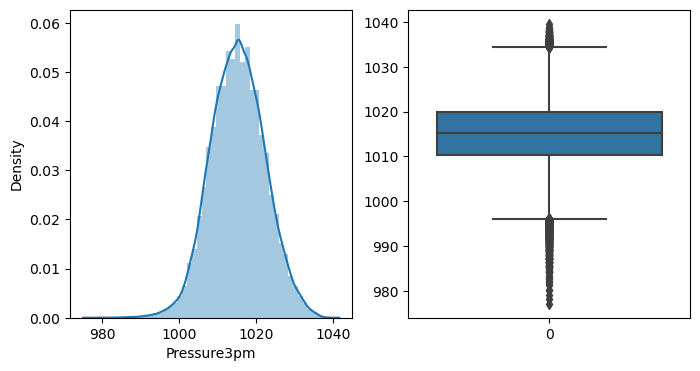

Lower Range: 996.0 Upper Range: 1034.4
Number of Outliers: 906


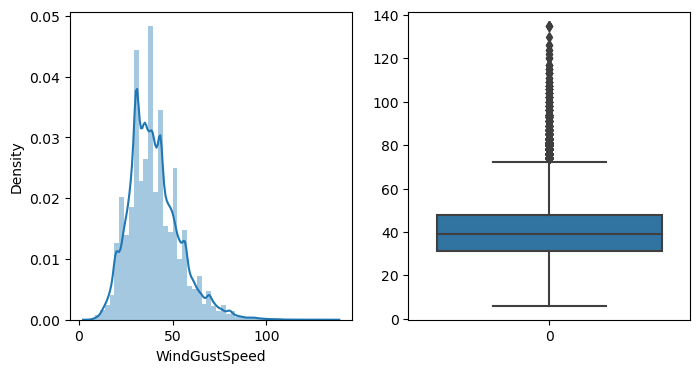

Lower Range: 5.5 Upper Range: 73.5
Number of Outliers: 3006


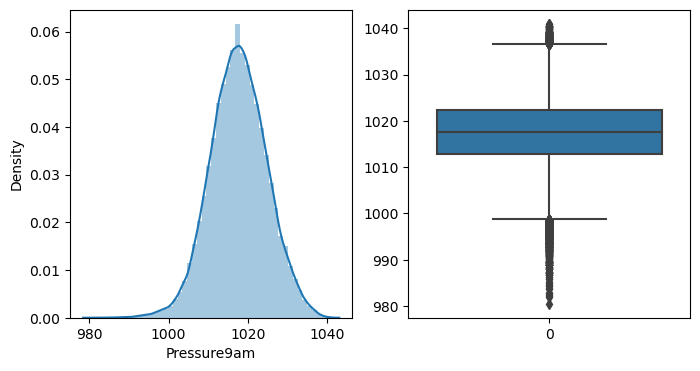

Lower Range: 998.65 Upper Range: 1036.65
Number of Outliers: 1174


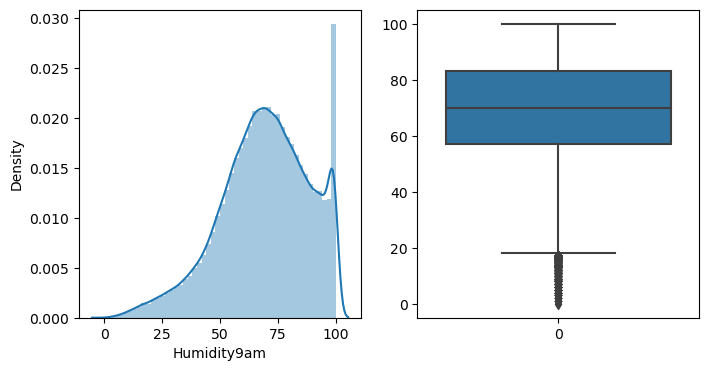

Lower Range: 18.0 Upper Range: 122.0
Number of Outliers: 1419


(136733, 23)

In [34]:
weather_no_outliers = outlier_pipeline_1.fit_transform(weather)
weather_no_outliers.shape

In [35]:
X = weather_no_outliers.drop('RainTomorrow', axis = 1)
y = weather_no_outliers['RainTomorrow']

In [36]:
print('X Shape', X.shape)
print('y Shape', y.shape)


X Shape (136733, 22)
y Shape (136733,)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

In [38]:
X_train_date = date_pipeline.fit_transform(X_train)
X_train_num = num_pipeline.fit_transform(X_train_date)
X_train_cat = cat_pipeline.fit_transform(X_train_date)
print('X_train_num.shape', X_train_num.shape)
print('X_train_cat.shape', X_train_cat.shape)



X_train_num.shape (123059, 11)
X_train_cat.shape (123059, 103)


In [39]:
X_train_processed = np.concatenate((X_train_num, X_train_cat), axis=1)
print('X_train_processed.shape', X_train_processed.shape)

X_train_processed.shape (123059, 114)


In [40]:
print('y_train.shape', y_train.shape)

y_train.shape (123059,)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_processed, y_train)
y_pred = forest_clf.predict(X_train_processed)

In [42]:
print('Train score is {:.2f}'.format(accuracy_score(y_train, y_pred )*100))

Train score is 100.00


In [44]:
y_train = y_train.replace('No', 0)
y_train = y_train.replace('Yes', 1)

In [46]:
forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_processed, y_train)
y_pred = forest_clf.predict(X_train_processed)

In [47]:
print('Train score is {:.2f}'.format(accuracy_score(y_train, y_pred )*100))

Train score is 100.00


In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_clf, X_train_processed, y_train, cv = 5)
print(scores)

[0.84714773 0.84844791 0.84751341 0.84743215 0.85063589]


In [49]:
forest_clf = RandomForestClassifier(max_depth = 3)
scores = cross_val_score(forest_clf, X_train_processed, y_train, cv = 5)
print(scores)

[0.78486104 0.78299204 0.78384528 0.7830733  0.78420219]


In [50]:
forest_clf = RandomForestClassifier(max_depth = 8)
scores = cross_val_score(forest_clf, X_train_processed, y_train, cv = 5)
print(scores)

[0.81809686 0.81882821 0.81878758 0.81606533 0.82048677]


In [51]:
forest_clf = RandomForestClassifier(max_depth = 10)
scores = cross_val_score(forest_clf, X_train_processed, y_train, cv = 5)
print(scores)

[0.82862019 0.82500406 0.8259792  0.82415082 0.82784121]


In [52]:
forest_clf = RandomForestClassifier(max_depth = 10, n_estimators = 50)
scores = cross_val_score(forest_clf, X_train_processed, y_train, cv = 5)
print(scores)

[0.82569478 0.82825451 0.82577604 0.82756379 0.82751615]


In [56]:
forest_clf = RandomForestClassifier(max_depth = 10, n_estimators = 50)
forest_clf.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [58]:
X_test_date = date_pipeline.fit_transform(X_test)
X_test_num = num_pipeline.fit_transform(X_test_date)
X_test_cat = cat_pipeline.fit_transform(X_test_date)
print('X_test_num.shape', X_test_num.shape)
print('X_test_cat.shape', X_test_cat.shape)
X_test_processed = np.concatenate((X_test_num, X_test_cat), axis=1)
print('X_test_processed.shape', X_test_processed.shape)
y_test = y_test.replace('No', 0)
y_test = y_test.replace('Yes', 1)
print('y_test.shape', y_test.shape)

X_test_num.shape (13674, 11)
X_test_cat.shape (13674, 103)
X_test_processed.shape (13674, 114)
y_test.shape (13674,)


In [59]:
y_test_pred = forest_clf.predict(X_test_processed)

In [85]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([0,1])
    plt.grid(True)
    plt.show()


ConfusionMatrix: [[10430   275]
 [ 2116   853]]
P-Score: 0.7562056737588653
R-Score: 0.2873021219265746


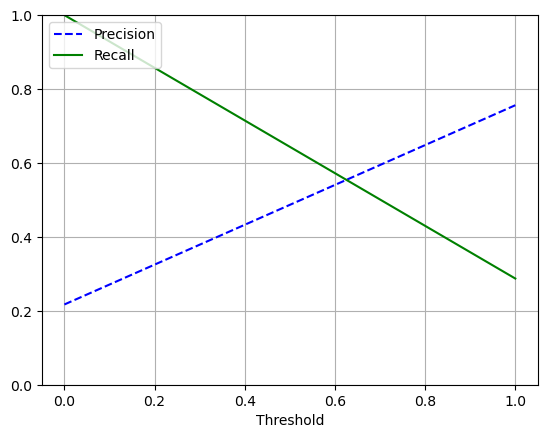

In [64]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve

print('ConfusionMatrix:', confusion_matrix(y_test, y_test_pred ))
print('P-Score:', precision_score(y_test, y_test_pred ))
print('R-Score:', recall_score(y_test, y_test_pred ))

precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred )
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [79]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 10)
log_reg.fit(X_train_processed, y_train)
y_pred = log_reg.predict(X_train_processed)
print('Train score is {:.2f}'.format(accuracy_score(y_train.values, y_pred )*100))

Train score is 84.25


In [69]:
y_test_pred = log_reg.predict(X_test_processed)

ConfusionMatrix: [[10107   598]
 [ 1573  1396]]
P-Score: 0.7001003009027081
R-Score: 0.47019198383294036


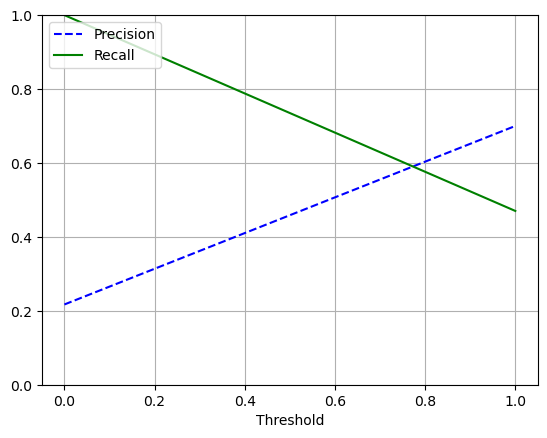

In [70]:
print('ConfusionMatrix:', confusion_matrix(y_test, y_test_pred ))
print('P-Score:', precision_score(y_test, y_test_pred ))
print('R-Score:', recall_score(y_test, y_test_pred ))

precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred )
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [83]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)
y_pred = xgb.predict(X_train_processed)
print('Train score is {:.2f}'.format(accuracy_score(y_train.values, y_pred )*100))

Train score is 88.24


In [84]:
y_test_pred = log_reg.predict(X_test_processed)

ConfusionMatrix: [[10109   596]
 [ 1573  1396]]
P-Score: 0.7008032128514057
R-Score: 0.47019198383294036


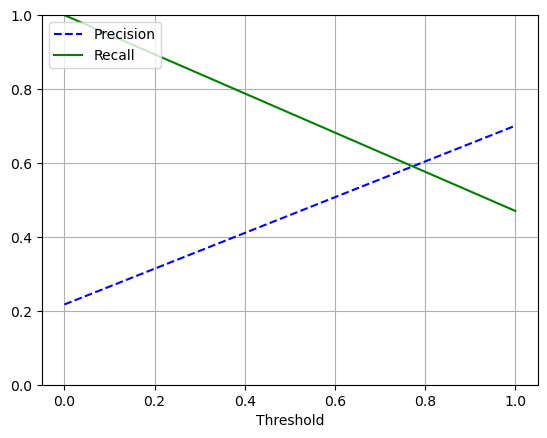

In [85]:
print('ConfusionMatrix:', confusion_matrix(y_test, y_test_pred ))
print('P-Score:', precision_score(y_test, y_test_pred ))
print('R-Score:', recall_score(y_test, y_test_pred ))

precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred )
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

# New Try

DataFrame shape: (142193, 23)


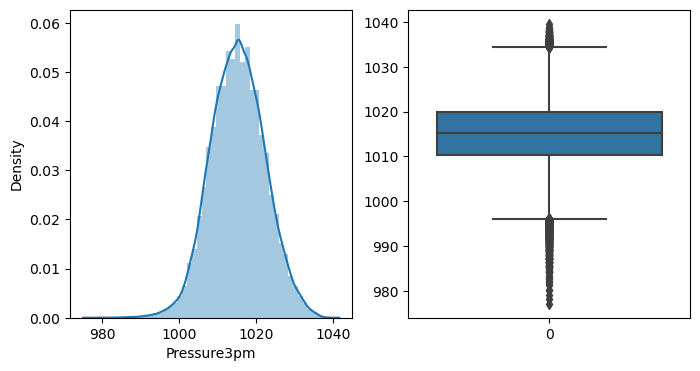

Lower Range: 996.0 Upper Range: 1034.4
Number of Outliers: 906


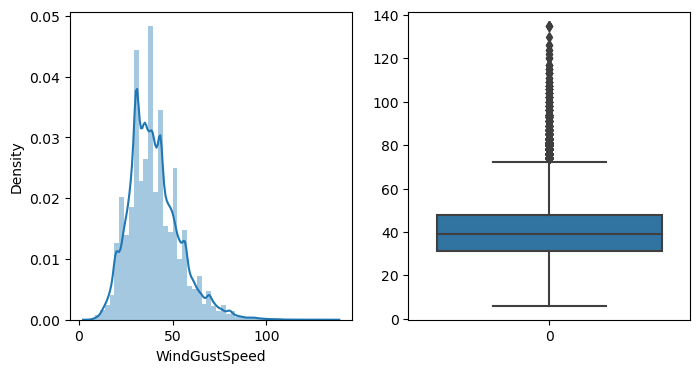

Lower Range: 5.5 Upper Range: 73.5
Number of Outliers: 3006


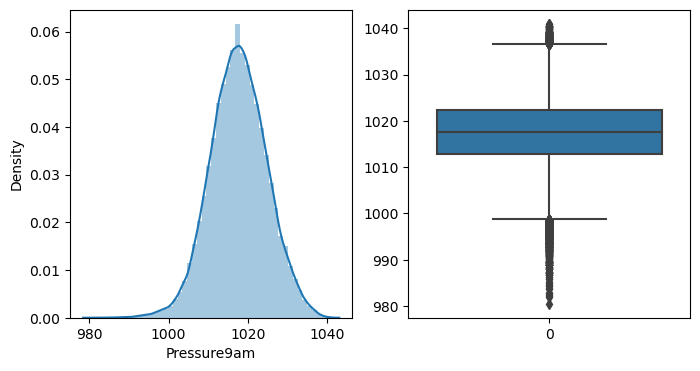

Lower Range: 998.65 Upper Range: 1036.65
Number of Outliers: 1174


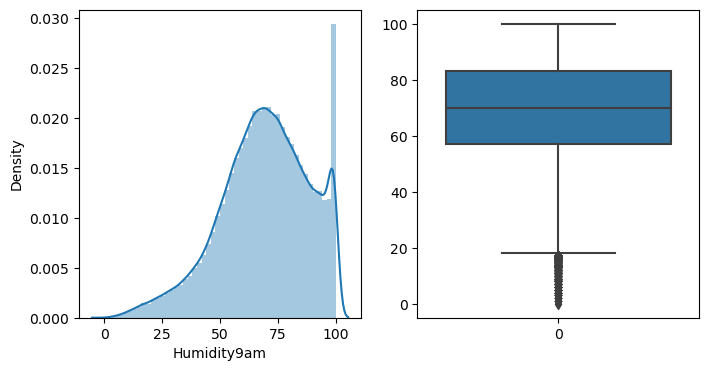

Lower Range: 18.0 Upper Range: 122.0
Number of Outliers: 1419
No Oultiers Shape: (136733, 23)
X Shape (136733, 22)
y Shape (136733,)


In [14]:
weather = df[df['RainTomorrow'].notna()].copy()
print('DataFrame shape:', weather.shape)
weather_no_outliers = outlier_pipeline_1.fit_transform(weather)
print('No Oultiers Shape:', weather_no_outliers.shape)
X = weather_no_outliers.drop('RainTomorrow', axis = 1)
y = weather_no_outliers['RainTomorrow']
print('X Shape', X.shape)
print('y Shape', y.shape)

In [19]:
weather_no_na = weather_no_outliers.dropna()

In [21]:
print('DataFrame shape:', weather_no_na.shape)

DataFrame shape: (53911, 23)


In [23]:
X = weather_no_na.drop('RainTomorrow', axis = 1)
y = weather_no_na['RainTomorrow']
print('X Shape', X.shape)
print('y Shape', y.shape)

X Shape (53911, 22)
y Shape (53911,)


In [24]:
X.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [26]:
cat_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
num_columns = ['Date','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 
               'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
               'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [27]:
X = date_pipeline.fit_transform(X)

In [32]:
X_cat_ohe = pd.get_dummies(X[cat_columns])

In [33]:
X_cat_ohe.shape

(53911, 76)

In [36]:
X_processed = pd.concat([X_cat_ohe, X[num_columns]], axis = 1)

In [37]:
X_processed.shape

(53911, 93)

In [38]:
y = y.replace('No', 0)
y = y.replace('Yes', 1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.1, stratify = y, random_state = 42)

In [44]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)

X_train.shape (48519, 93)
y_train.shape (48519,)
X_test.shape (5392, 93)
y_test.shape (5392,)


In [45]:
X_train_cat = X_train.drop(num_columns, axis = 1)

In [46]:
X_train_cat.shape

(48519, 76)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train[num_columns])
X_train_num = scaler.transform(X_train[num_columns])
print('X_train_num.shape',X_train_num.shape)
print('X_train_cat.shape',X_train_cat.shape)
X_train_processed = np.concatenate([X_train_num,X_train_cat.to_numpy()], axis = 1)
print('X_train_processed.shape', X_train_processed.shape)

X_train_num.shape (48519, 17)
X_train_cat.shape (48519, 76)
X_train_processed.shape (48519, 93)


In [71]:
y_train = y_train.values

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier()

scores = cross_val_score(forest_clf, X_train_processed, y_train, cv = 5, scoring = 'accuracy')
print('Cross Val Score:', scores)


Cross Val Score: [0.85624485 0.86593157 0.86819868 0.86191261 0.86004329]


In [170]:
forest_clf = RandomForestClassifier(max_depth = 11, n_estimators = 500, max_features = 15)
forest_clf.fit(X_train_processed, y_train)

RandomForestClassifier(max_depth=11, max_features=15, n_estimators=500)

In [171]:
y_pred = forest_clf.predict(X_train_processed)
print('Train score is {:.2f}'.format(accuracy_score(y_train, y_pred )*100))

Train score is 89.44


In [172]:
X_test_cat = X_test.drop(num_columns, axis = 1)
print('X_test_cat.shape', X_test_cat.shape)
X_test_num = scaler.transform(X_test[num_columns])
print('X_test_num.shape',X_test_num.shape)
print('X_test_cat.shape',X_test_cat.shape)
X_test_processed = np.concatenate([X_test_num,X_test_cat.to_numpy()], axis = 1)
print('X_test_processed.shape', X_test_processed.shape)
#y_test = y_test.values

X_test_cat.shape (5392, 76)
X_test_num.shape (5392, 17)
X_test_cat.shape (5392, 76)
X_test_processed.shape (5392, 93)


In [173]:
y_test_pred = forest_clf.predict(X_test_processed)

accuracy_score: 0.8545994065281899
ConfusionMatrix: [[4066  178]
 [ 606  542]]
P-Score: 0.7527777777777778
R-Score: 0.4721254355400697


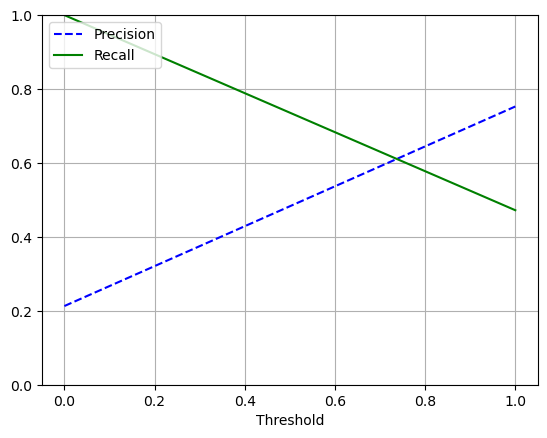

In [174]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_curve, accuracy_score

print('accuracy_score:', accuracy_score(y_test, y_test_pred ))
print('ConfusionMatrix:', confusion_matrix(y_test, y_test_pred ))
print('P-Score:', precision_score(y_test, y_test_pred ))
print('R-Score:', recall_score(y_test, y_test_pred ))

precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred )
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)